In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Online-fraud-dataset.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [4]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 2
Float variables: 5


C:\Users\Samriddhi\AppData\Local\Temp\ipykernel_8932\230181338.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='Set2')


<Axes: xlabel='type', ylabel='count'>

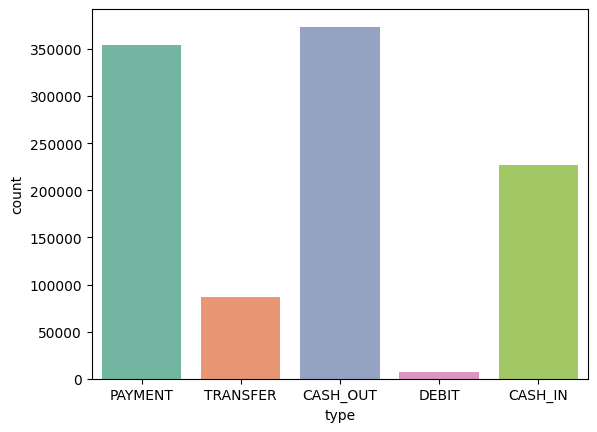

In [5]:
sns.countplot(x='type', data=data, palette='Set2')

C:\Users\Samriddhi\AppData\Local\Temp\ipykernel_8932\328470552.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='amount', data=data, palette='Set2')


<Axes: xlabel='type', ylabel='amount'>

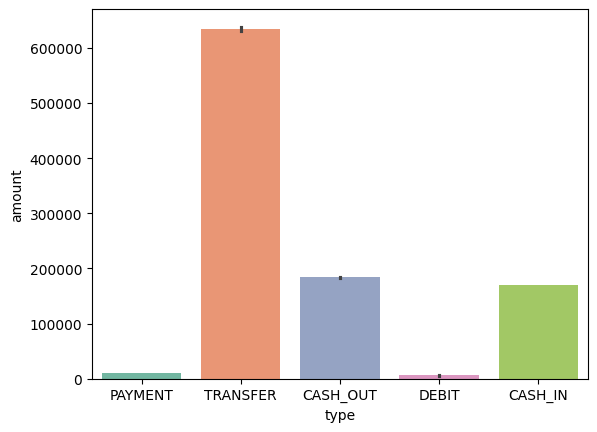

In [6]:
sns.barplot(x='type', y='amount', data=data, palette='Set2')

In [7]:
data['isFraud'].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

<Axes: xlabel='step', ylabel='Count'>

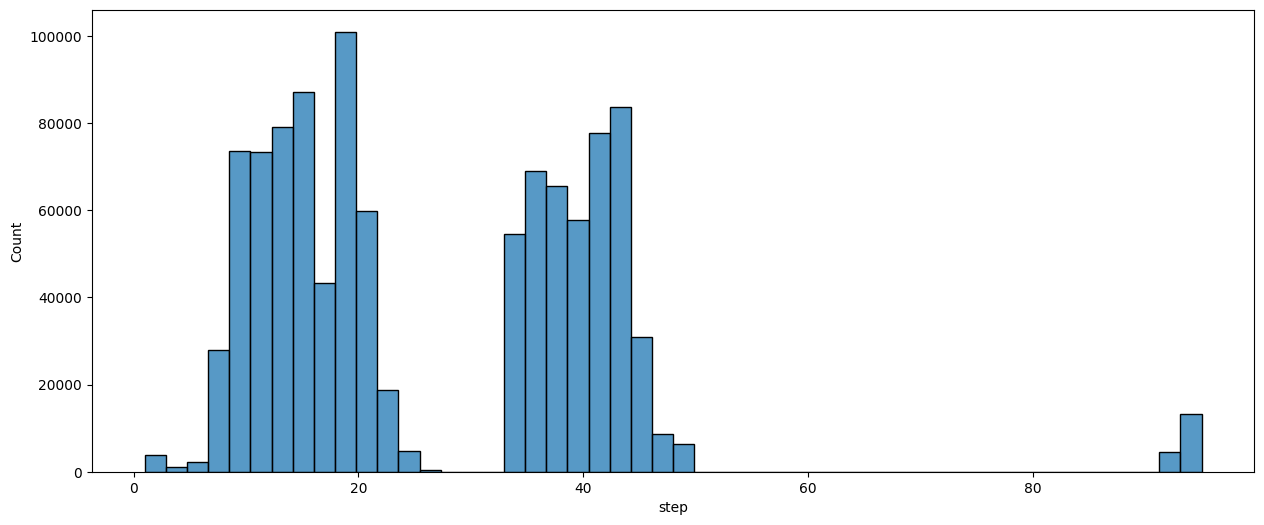

In [8]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50)

<Axes: >

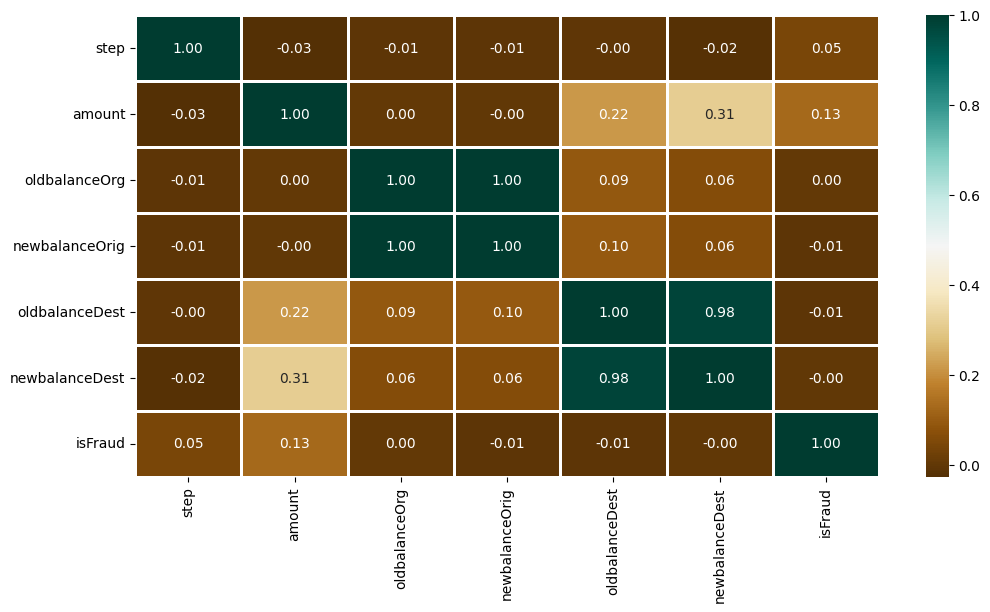

In [9]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [10]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,False,False,True,False


In [11]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [12]:
X.shape, y.shape

((1048575, 10), (1048575,))

In [13]:
# %pip install scikit-learn

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)

In [15]:
# %pip install xgboost

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [17]:
# models = [LogisticRegression(), XGBClassifier(),
# 		SVC(kernel='rbf', probability=True),
# 		RandomForestClassifier(n_estimators=7,
# 								criterion='entropy', 
# 								random_state=7)]

# for i in range(len(models)):
# 	models[i].fit(X_train, y_train)
# 	print(f'{models[i]} : ')
	
# 	train_preds = models[i].predict_proba(X_train)[:, 1]
# 	print('Training Accuracy : ', ras(y_train, train_preds))
	
# 	y_preds = models[i].predict_proba(X_test)[:, 1]
# 	print('Validation Accuracy : ', ras(y_test, y_preds))
# 	print()

In [18]:
models = [
    LogisticRegression(max_iter=500),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
    
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression(max_iter=500) : 
Training Accuracy :  0.9834582122670803
Validation Accuracy :  0.977299761045029

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999973092422925
Validation Accuracy :  0.9945838283597735

RandomForestClassifier(criterion='entr

In [22]:
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(models[1], X_test, y_test)
# plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Samriddhi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\__init__.py)

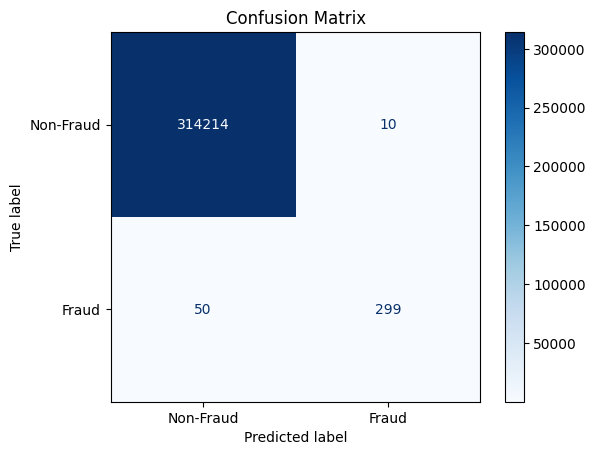

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_preds = models[1].predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])

# Plot confusion matrix with a color map
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import joblib

In [28]:
joblib.dump(models[1], 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']